<a href="https://colab.research.google.com/github/Amalia-zam/Portfolio/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [6]:
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from skopt import BayesSearchCV

from mlxtend.plotting import plot_confusion_matrix

In [7]:
import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

In [9]:
import multiprocessing as mp

In [10]:
from google.colab import files

In [11]:
df = pd.read_csv("heart.csv")
df.shape

(1025, 14)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [14]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

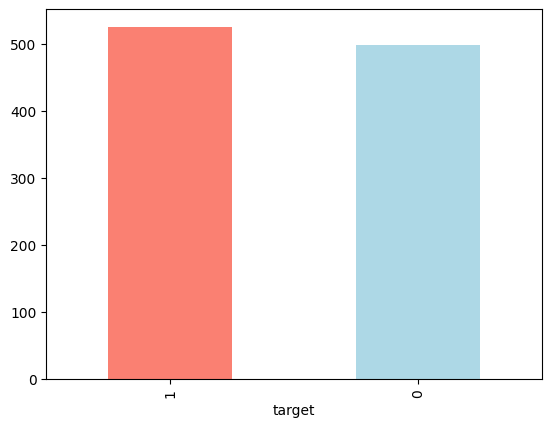

In [15]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

Num_cols = df.select_dtypes(exclude='object').columns.tolist()
Num_cols

print(f'categorical Columns: {cat_cols}')
print(f'numerical Columns: {Num_cols}')

categorical Columns: []
numerical Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [24]:
numerical_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

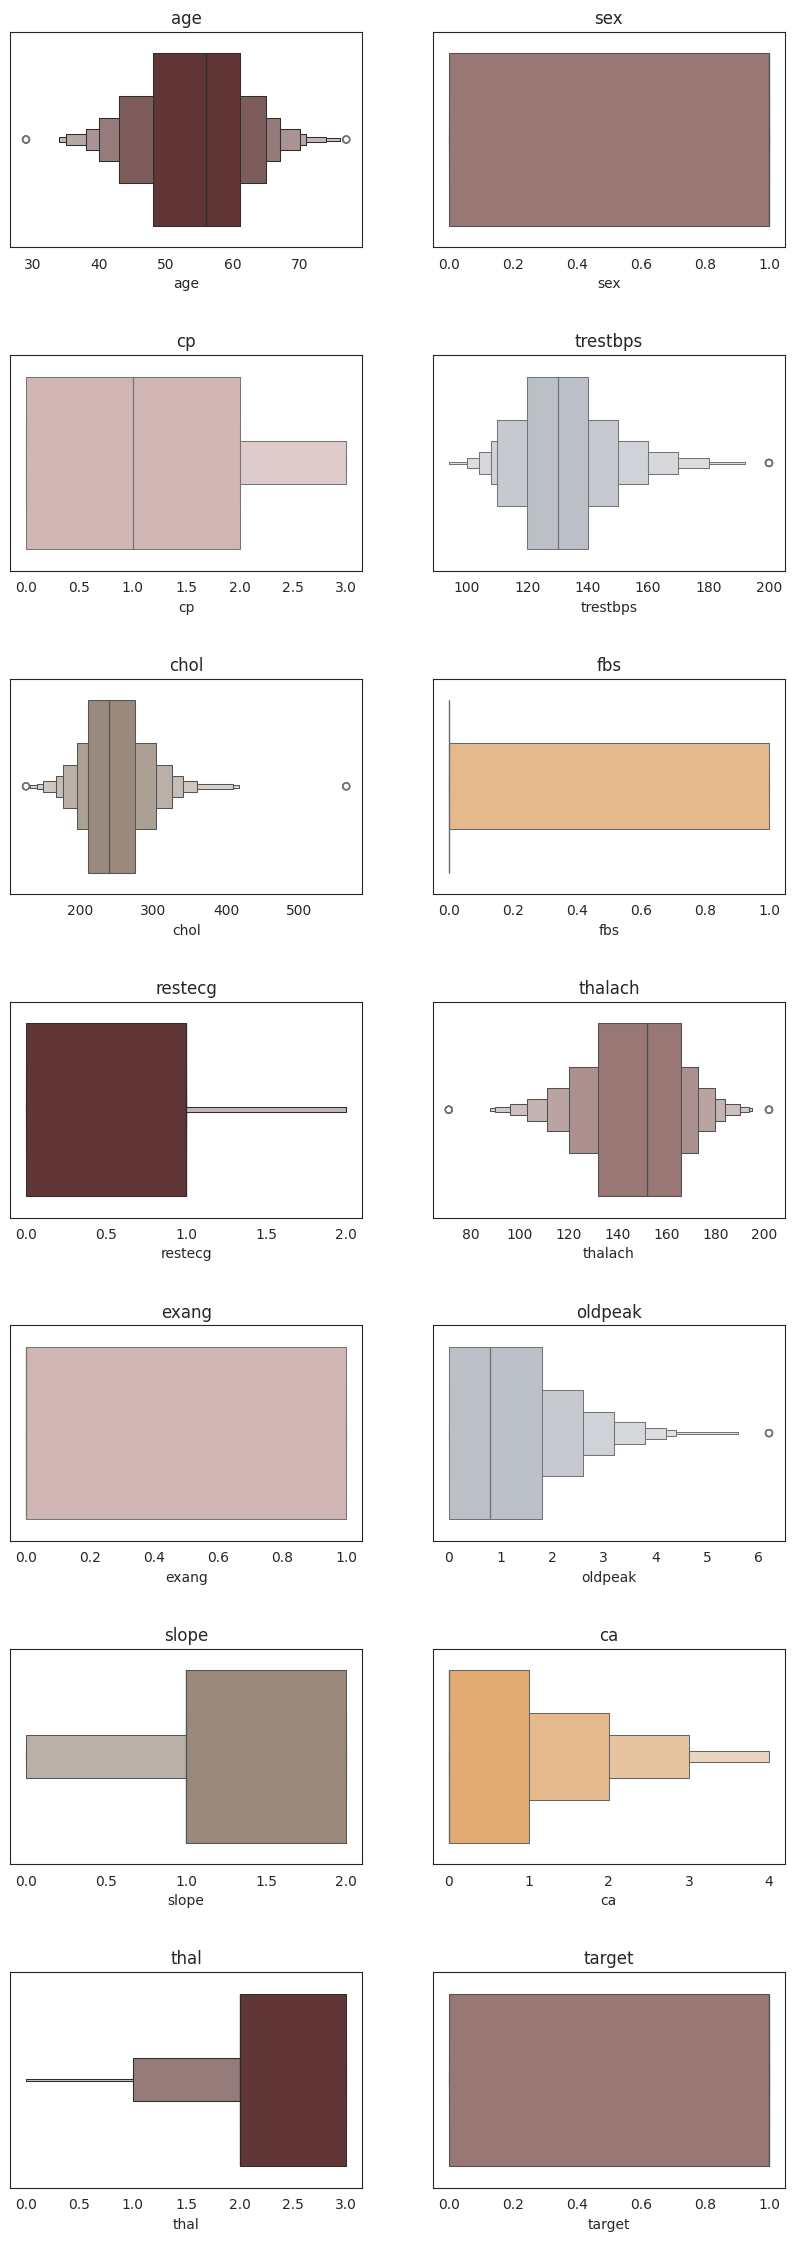

In [25]:
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(palette)

num_plots = len(numerical_cols)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 4), facecolor='white')

for i, col in enumerate(numerical_cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxenplot(x=df[col], color=palette[i % len(palette)], ax=ax)
    ax.set_title(col)

plt.subplots_adjust(hspace=0.5)
plt.show()


In [19]:
df['age'].min(), df['age'].max()

(29, 77)

In [20]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

<ipython-input-21-05656b3ec0b1>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)


<Axes: xlabel='age', ylabel='Count'>

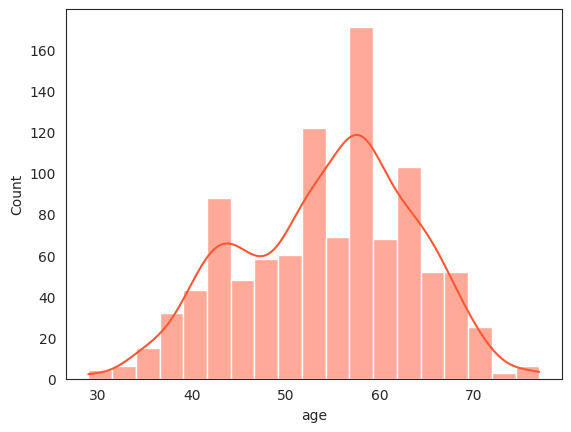

In [21]:
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]

sns.set_style("white")

sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)


Mean 54.43414634146342
Median 56.0
Mode 0    58
Name: age, dtype: int64


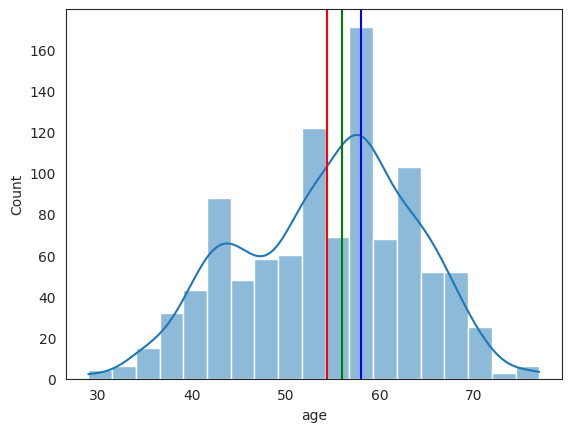

In [22]:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')

print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())


In [26]:
array = df.values
X = array[:, :-1]
y = array[:, -1]

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

print(X_scaled)

[[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]


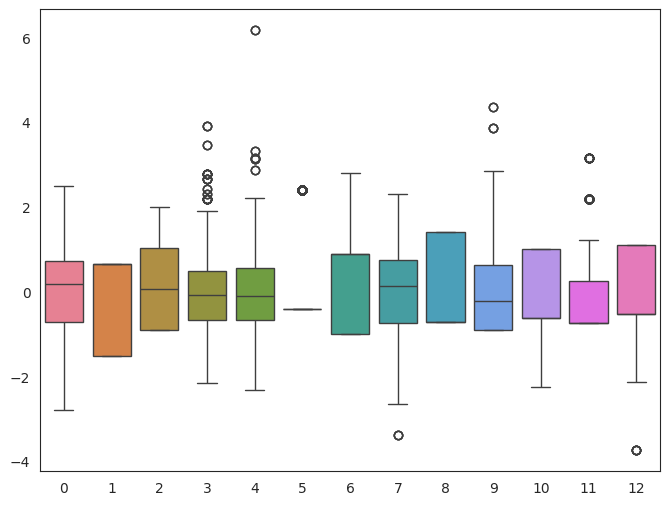

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(X_scaled)
plt.show()

In [28]:
def winsorize_outliers(X, limits=[0.05, 0.05]):
    winsorized_X = mstats.winsorize(X, limits=limits)
    return winsorized_X

X_scaled_winsorized = winsorize_outliers(X_scaled)
print(X_scaled_winsorized)

[[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -1.51170646 -0.73197147
   1.08985168]
 [ 1.49603635  0.66150409 -0.91575542 ... -1.51170646 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]


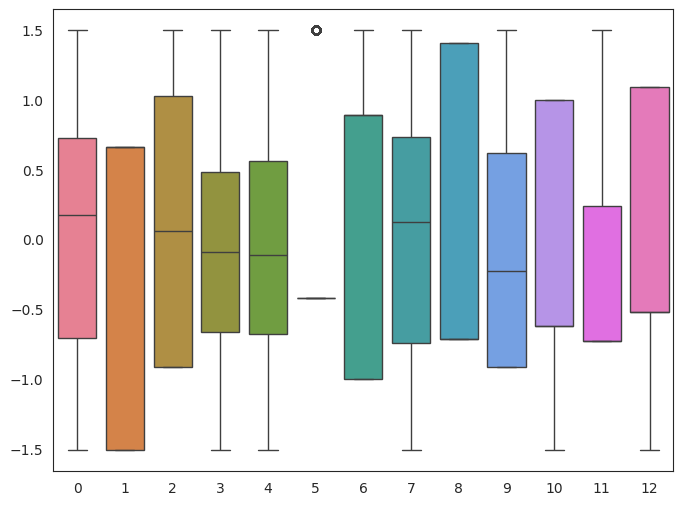

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(X_scaled_winsorized)
plt.show()

In [30]:
df_w = pd.DataFrame(X_scaled_winsorized, columns=df.columns[:-1])

df_w['target'] = y

print(df_w.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.268437  0.661504 -0.915755 -0.377636 -0.659332 -0.418878  0.891255   
1 -0.158157  0.661504 -0.915755  0.479107 -0.833861  1.496036 -1.004049   
2  1.496036  0.661504 -0.915755  0.764688 -1.396233 -0.418878  0.891255   
3  0.724079  0.661504 -0.915755  0.936037 -0.833861 -0.418878  0.891255   
4  0.834359 -1.511706 -0.915755  0.364875  0.930822  1.496036  0.891255   

    thalach     exang   oldpeak     slope        ca      thal  target  
0  0.821321 -0.712287 -0.060888  0.995433  1.209221  1.089852     0.0  
1  0.255968  1.403928  1.496036 -1.511706 -0.731971  1.089852     0.0  
2 -1.048692  1.403928  1.301417 -1.511706 -0.731971  1.089852     0.0  
3  0.516900 -0.712287 -0.912329  0.995433  0.238625  1.089852     0.0  
4 -1.511706 -0.712287  0.705408 -0.624121  1.496036 -0.522122     0.0  


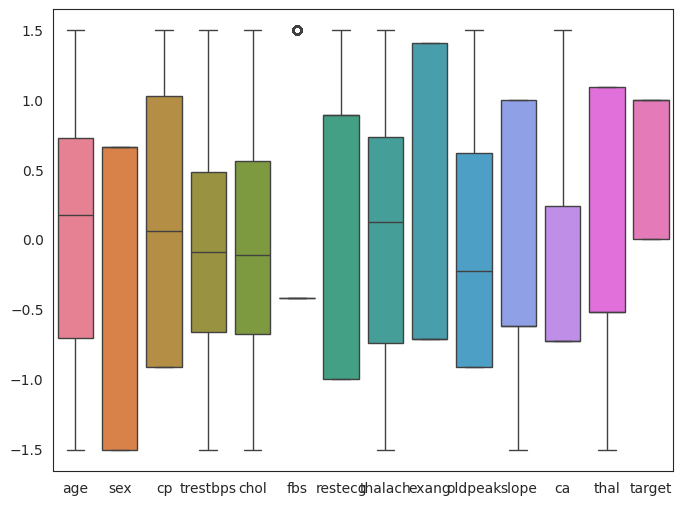

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_w)
plt.show()

In [32]:
df = df_w

In [33]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0.0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,1.496036,-1.004049,0.255968,1.403928,1.496036,-1.511706,-0.731971,1.089852,0.0
2,1.496036,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-1.511706,-0.731971,1.089852,0.0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0.0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,1.496036,0.891255,-1.511706,-0.712287,0.705408,-0.624121,1.496036,-0.522122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,1.0
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,0.0
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,0.0
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1.0


In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0.0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,1.496036,-1.004049,0.255968,1.403928,1.496036,-1.511706,-0.731971,1.089852,0.0
2,1.496036,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-1.511706,-0.731971,1.089852,0.0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0.0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,1.496036,0.891255,-1.511706,-0.712287,0.705408,-0.624121,1.496036,-0.522122,0.0


In [35]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.100019,-0.086017,0.293027,0.204270,0.121104,-0.155702,-0.376509,0.085125,0.238671,-0.182920,0.331391,0.095441,-0.238543
sex,-0.100019,1.000000,-0.056141,-0.064402,-0.162903,0.027200,-0.039136,-0.044218,0.139157,0.102941,-0.020243,0.099135,0.243897,-0.279501
cp,-0.086017,-0.056141,1.000000,0.036444,-0.097920,0.078516,0.069415,0.319376,-0.416935,-0.194804,0.162037,-0.213999,-0.207945,0.455052
trestbps,0.293027,-0.064402,0.036444,1.000000,0.126543,0.155058,-0.138114,-0.043486,0.035216,0.147975,-0.085555,0.106186,0.057582,-0.120089
chol,0.204270,-0.162903,-0.097920,0.126543,1.000000,0.034145,-0.146116,-0.038568,0.086054,0.048544,-0.016149,0.110827,0.076547,-0.127334
fbs,0.121104,0.027200,0.078516,0.155058,0.034145,1.000000,-0.100301,-0.003092,0.049261,0.023371,-0.046943,0.148290,-0.011026,-0.041164
restecg,-0.155702,-0.039136,0.069415,-0.138114,-0.146116,-0.100301,1.000000,0.092299,-0.076648,-0.094693,0.117154,-0.108517,-0.014920,0.152632
thalach,-0.376509,-0.044218,0.319376,-0.043486,-0.038568,-0.003092,0.092299,1.000000,-0.402363,-0.404097,0.439428,-0.234327,-0.153294,0.425629
exang,0.085125,0.139157,-0.416935,0.035216,0.086054,0.049261,-0.076648,-0.402363,1.000000,0.333699,-0.283748,0.142774,0.243481,-0.438029
oldpeak,0.238671,0.102941,-0.194804,0.147975,0.048544,0.023371,-0.094693,-0.404097,0.333699,1.000000,-0.572590,0.251837,0.239054,-0.452219


In [36]:
X = df.drop("target", axis=1)

y = df["target"]

In [37]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,1.496036,-1.004049,0.255968,1.403928,1.496036,-1.511706,-0.731971,1.089852
2,1.496036,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-1.511706,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,1.496036,0.891255,-1.511706,-0.712287,0.705408,-0.624121,1.496036,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122


In [38]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1020    1.0
1021    0.0
1022    0.0
1023    1.0
1024    0.0
Name: target, Length: 1025, dtype: float64

In [39]:
Label_Encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = Label_Encoder.fit_transform(X[col])
    else:
        pass

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [40]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
576,-0.268437,0.661504,1.496036,1.164502,1.008390,1.496036,0.891255,1.256207,-0.712287,0.109400,-0.624121,-0.731971,1.089852
254,-1.511706,0.661504,-0.915755,-0.663216,-0.930822,-0.418878,0.891255,-0.831249,1.403928,0.449976,-0.624121,-0.731971,1.089852
723,1.496036,-1.511706,1.027618,-0.663216,-0.678724,-0.418878,-1.004049,-1.483579,-0.712287,0.364832,-0.624121,-0.731971,-0.522122
929,0.613800,0.661504,-0.915755,-0.092055,-0.775685,-0.418878,-1.004049,-0.744271,1.403928,1.131129,-0.624121,1.209221,1.089852
539,1.054918,0.661504,1.496036,1.496036,-0.368450,-0.418878,-1.004049,0.255968,-0.712287,-0.401465,-0.624121,-0.731971,1.089852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-1.481512,0.661504,1.027618,-0.092055,-0.620548,-0.418878,-1.004049,0.821321,-0.712287,0.790552,-0.624121,-0.731971,-0.522122
71,0.724079,0.661504,-0.915755,0.479107,-0.756293,-0.418878,-1.004049,-0.483339,1.403928,0.705408,0.995433,0.238625,1.089852
106,-0.378716,0.661504,-0.915755,0.479107,1.027782,-0.418878,0.891255,1.038764,1.403928,0.449976,0.995433,-0.731971,1.089852
270,-1.260953,0.661504,-0.915755,-1.234378,-0.678724,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,-0.731971,1.089852


In [41]:
y_train, len(y_train)

(576    1.0
 254    0.0
 723    1.0
 929    0.0
 539    1.0
       ... 
 700    1.0
 71     0.0
 106    0.0
 270    1.0
 860    0.0
 Name: target, Length: 922, dtype: float64,
 922)

In [42]:
def fit_and_score(seed):
    np.random.seed(seed)
    model = MLPClassifier(max_iter=2000, random_state=seed)
    model.fit(X_train, y_train)

    scores_per_iter = []
    for iter_score in model.loss_curve_:
        scores_per_iter.append(iter_score)

    final_score = model.score(X_test, y_test)
    return model, scores_per_iter, final_score, seed

num_experiments = 25

if __name__ == '__main__':
    pool = mp.Pool(mp.cpu_count())
    results = pool.map(fit_and_score, range(num_experiments))
    pool.close()
    pool.join()

    models, scores_per_iter_all, final_scores, seeds = zip(*results)

    best_index = np.argmax(final_scores)
    best_model = models[best_index]
    best_final_score = final_scores[best_index]
    best_seed = seeds[best_index]

    if isinstance(best_final_score, float):
        print(f"Best final score: {best_final_score:.3f}")
    else:
        print(f"Best final score: {best_final_score}")

    print(f"Best seed: {best_seed}")

    # Create DataFrame
    mlp_df = pd.DataFrame({
        'Run': range(1, num_experiments + 1),
        'Final Score': final_scores,
        'Seed': seeds,
        'Scores per Iteration': scores_per_iter_all
    })

    # DataFrame to CSV
    mlp_df.to_csv('mlp_results.csv', index=False)

Best final score: 0.971
Best seed: 0


In [43]:
results = {}

start_time = time.time()
mlp = MLPClassifier(max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
end_time = time.time()
training_time = end_time - start_time

results['Neural Networks (Multi-layer Perceptron)'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time
]

print("Results for Neural Networks (Multi-layer Perceptron):")
for metric, value in zip(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time'], results['Neural Networks (Multi-layer Perceptron)']):
    print(f"{metric}: {value}")

Results for Neural Networks (Multi-layer Perceptron):
Accuracy: 0.970873786407767
Precision: 0.9723062231418111
Recall: 0.970873786407767
F1 Score: 0.9707387474574698
Training Time: 4.206345081329346


In [56]:
space = [
    Integer(10, 200, name='hidden_layer_sizes'),
    Real(1e-6, 1e-2, prior='log-uniform', name='alpha'),
    Real(1e-4, 1e-1, prior='log-uniform', name='learning_rate_init'),
    Categorical(['constant', 'invscaling', 'adaptive'], name='learning_rate')
]

@use_named_args(space)
def objective(**params):
    try:
        params['hidden_layer_sizes'] = (params['hidden_layer_sizes'],)
        clf = MLPClassifier(max_iter=2000, random_state=42, **params)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        return -score
    except Exception as e:
        logging.error(f"An error occurred: {e}")
        return None

def run_optimization(seed):
    try:
        res = gp_minimize(objective, space, n_calls=50, random_state=seed, verbose=False)
        return res
    except Exception as e:
        logging.error(f"An error occurred: {e}")
        return None

if __name__ == '__main__':
    num_experiments = 25

    results_df = pd.DataFrame(columns=['Experiment', 'Best Score', 'Best Parameters'])

    pool = mp.Pool(mp.cpu_count())
    results = pool.map(run_optimization, range(num_experiments))
    pool.close()

    for i, res in enumerate(results):
        if res is not None:
            best_score = -res.fun
            best_params = res.x
            results_df.loc[i] = [i+1, best_score, best_params]

    results_df.to_csv('experiment_results.csv', index=False)

In [57]:
mean_best_score = results_df['Best Score'].mean()
std_best_score = results_df['Best Score'].std()

print(f"Mean of Best Scores: {mean_best_score}")
print(f"Standard Deviation of Best Scores: {std_best_score}")

Mean of Best Scores: 0.9720388349514564
Standard Deviation of Best Scores: 0.0058252427184465995


In [60]:
best_model_mlp = MLPClassifier(max_iter=2000, random_state=42, **best_params_dict)
best_model_mlp.fit(X_train, y_train)

y_pred_mlp = best_model_mlp.predict(X_test)
score = accuracy_score(y_test, y_pred_mlp)

In [61]:
ac_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy score for model " f'{best_model_mlp} : ', ac_mlp)

Accuracy score for model MLPClassifier(alpha=5.4412163291385e-06, hidden_layer_sizes=(10,),
              learning_rate='invscaling',
              learning_rate_init=0.04003119202083318, max_iter=2000,
              random_state=42) :  1.0


In [62]:
cr_mlp = classification_report(y_test, y_pred_mlp)
print("Classification report for model " f'{best_model_mlp} : \n', cr_mlp)

Classification report for model MLPClassifier(alpha=5.4412163291385e-06, hidden_layer_sizes=(10,),
              learning_rate='invscaling',
              learning_rate_init=0.04003119202083318, max_iter=2000,
              random_state=42) : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        58
         1.0       1.00      1.00      1.00        45

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



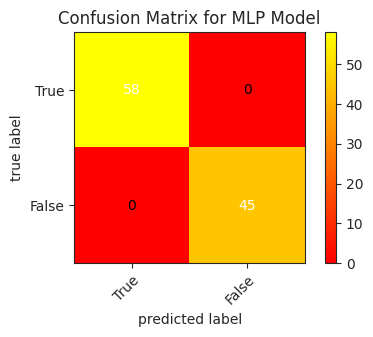

In [63]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
fig, ax = plot_confusion_matrix(conf_mat=cm_mlp,
                                show_absolute=True,
                                colorbar=True,
                                cmap='autumn',
                                class_names=[True, False],
                                figsize=(5, 3))
plt.title("Confusion Matrix for MLP Model")
plt.show()
